In [1]:
%matplotlib inline
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random
import xgboost as xgb
from sklearn.metrics import matthews_corrcoef

In [225]:
%%time
os.chdir('C:\\Users\\royal\\Downloads\\Compressed\\data\\d17428d0-e-Criminal')
train=pd.read_csv('criminal_train.csv')
test=pd.read_csv('criminal_test.csv')

Wall time: 1.48 s


In [7]:
%%time
os.chdir('C:\\Users\\royal\\Downloads\\Compressed\\Hacker-chall')
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

Wall time: 1.33 s


In [6]:
%%time
os.chdir('C:\\Users\\royal\\Downloads\\Compressed\\Hacker-chall')
d_train=pd.read_csv('denoise_train.csv' ,sep=' ',header=None)
d_test=pd.read_csv('denoise_test.csv', sep=' ',header=None)

Wall time: 22.8 s


In [2]:
%%time
os.chdir('C:\\Users\\royal\\Downloads\\Compressed\\denoiseAutoencode')
d_train = np.load('train_data_dae_org.npy')
d_test = np.load('test_data_dae_org.npy')
# d_train = np.load('denoise_train.npy')
# d_test = np.load('denoise_test.npy')

Wall time: 261 ms


In [3]:
print(d_train.shape)
print(d_test.shape)


(45716, 403)
(11430, 403)


In [23]:
##first 5 rows of training data
test.head()
train.head()
# d_train[:2]

array([[-5.48795760e-02,  1.25318155e-01,  8.29152614e-02,
         9.25778627e-01,  6.29769206e-01,  8.87641311e-01,
         7.29760885e-01,  8.18233311e-01, -5.78339219e-01,
        -2.39266083e-01,  4.06918079e-01, -1.09215939e+00,
        -6.67461634e-01,  5.41478276e-01,  9.88165557e-01,
         2.31943846e-01, -2.51660466e-01,  7.65727237e-02,
         9.23870653e-02,  1.37778550e-01, -4.20466006e-01,
        -4.71076667e-01, -3.91705543e-01, -3.00415844e-01,
        -3.39881897e-01,  1.21521461e+00,  6.55683696e-01,
         2.10518789e+00,  7.75538087e-01,  1.85955858e+00,
         1.10226429e+00,  1.83670115e+00,  9.44731355e-01,
         1.01014160e+02,  9.79411030e+00,  9.84654617e+01,
         9.84030685e+01, -8.14573944e-01,  9.27991986e-01,
         7.34714985e-01,  2.03374457e+00, -8.75997901e-01,
        -7.90108085e-01,  2.00758815e+00,  9.01264668e-01,
         2.00539398e+00,  1.08566570e+00,  8.91553819e-01,
         1.13584745e+00,  2.00592327e+00,  1.02926898e+0

In [192]:
#column names
# len(train.columns)
train.shape

(45716, 72)

In [226]:
train.drop([19230, 44281],inplace=True)

In [228]:
train.to_csv('criminal_train_clean.csv', index=False)

In [3]:
train.groupby('Criminal')['Criminal'].count()

Criminal
0    42541
1     3175
Name: Criminal, dtype: int64

In [97]:
train.drop([19230, 44281],inplace=True)

In [181]:
for i in test.columns:
    print(i,test[i].unique())
# for i in test.columns:
#     print(i,test[i].unique())

IFATHER [3 1 0 2]
NRCH17_2 [0 1 3 2]
IRHHSIZ2 [3 2 5 1 0 4]
IIHHSIZ2 [0 1]
IRKI17_2 [1 0 2 3]
IIKI17_2 [0 1]
IRHH65_2 [0 1 2]
IIHH65_2 [0 2 1]
PRXRETRY [4 0 1 3]
PRXYDATA [5 0 1 2 4]
MEDICARE [1 0 4 3 2 5]
CAIDCHIP [1 0 3 4 2 5]
CHAMPUS [1 0 3 2 5 4]
PRVHLTIN [0 1 3 4 2 5]
GRPHLTIN [0 6 1 5 4 3 2]
HLTINNOS [5 1 0 2 4 3]
HLCNOTYR [1 6 0 5 3 4 2]
HLCNOTMO [16  0  3  9  1  2  6  8  5 15  7  4 10 11 13 14]
HLCLAST [8 3 4 2 0 1 7 5 6]
HLLOSRSN [16  2  9  1  3  6  0  5 15  4 10 11  7 14 13 12  8]
HLNVCOST [5 1 0 4 3]
HLNVOFFR [5 1 0 4 3]
HLNVREF [5 1 4 3 0]
HLNVNEED [5 1 4 0 3]
HLNVSOR [5 0 1 4 3]
IRMCDCHP [1 0]
IIMCDCHP [0 1]
IRMEDICR [1 0]
IIMEDICR [0 1]
IRCHMPUS [1 0]
IICHMPUS [0 1]
IRPRVHLT [0 1]
IIPRVHLT [0 1]
IROTHHLT [2 1 0]
IIOTHHLT [2 0 1]
HLCALLFG [1 0]
HLCALL99 [1 0]
ANYHLTI2 [0 1 2 3 4]
IRINSUR4 [0 1]
IIINSUR4 [0 1]
OTHINS [1 0]
CELLNOTCL [1 0 4 3 2 5]
CELLWRKNG [0 1 4 3 2 5]
IRFAMSOC [1 0]
IIFAMSOC [0 1]
IRFAMSSI [1 0]
IIFAMSSI [0 1]
IRFSTAMP [1 0]
IIFSTAMP [0 1]
IRFAMPMT [1 0]


In [109]:
# NRCH17_2
train['POVERTY3'].replace(-1,0,inplace=True)
# train['NRCH17_2'].replace(0,4,inplace=True)
train['NRCH17_2'].replace(-1,0,inplace=True)
test['POVERTY3'].replace(-1,0,inplace=True)
# test['NRCH17_2'].replace(0,4,inplace=True)
test['NRCH17_2'].replace(-1,0,inplace=True)

In [97]:
# len(test['ANALWT_C'].values)
for i in train.columns:
    print(i,len(train[i].unique()))

PERID 45718
IFATHER 5
NRCH17_2 5
IRHHSIZ2 7
IIHHSIZ2 3
IRKI17_2 5
IIKI17_2 3
IRHH65_2 4
IIHH65_2 4
PRXRETRY 6
PRXYDATA 7
MEDICARE 7
CAIDCHIP 7
CHAMPUS 7
PRVHLTIN 7
GRPHLTIN 8
HLTINNOS 7
HLCNOTYR 8
HLCNOTMO 18
HLCLAST 10
HLLOSRSN 18
HLNVCOST 7
HLNVOFFR 7
HLNVREF 7
HLNVNEED 7
HLNVSOR 7
IRMCDCHP 3
IIMCDCHP 3
IRMEDICR 3
IIMEDICR 3
IRCHMPUS 3
IICHMPUS 3
IRPRVHLT 3
IIPRVHLT 3
IROTHHLT 4
IIOTHHLT 4
HLCALLFG 3
HLCALL99 3
ANYHLTI2 6
IRINSUR4 3
IIINSUR4 3
OTHINS 3
CELLNOTCL 7
CELLWRKNG 7
IRFAMSOC 3
IIFAMSOC 3
IRFAMSSI 3
IIFAMSSI 3
IRFSTAMP 3
IIFSTAMP 3
IRFAMPMT 3
IIFAMPMT 3
IRFAMSVC 3
IIFAMSVC 3
IRWELMOS 14
IIWELMOS 4
IRPINC3 8
IRFAMIN3 8
IIPINC3 3
IIFAMIN3 3
GOVTPROG 3
POVERTY3 4
TOOLONG 4
TROUBUND 4
PDEN10 4
COUTYP2 4
MAIIN102 3
AIIND102 3
ANALWT_C 45647
VESTR 51
VEREP 3
Criminal 2


In [ ]:
for i in train.columns:
    print(i,len(train[train[i]==-1]))
# for i in test.columns:
#     print(i,len(test[test[i]==-1]))

In [60]:
pd.crosstab(train.POVERTY3,train.Criminal)

Criminal,0,1
POVERTY3,,
1,8489,842
2,8767,1458
3,25285,875


In [119]:
# len(test['ANALWT_C'].values)
cat_fet=[]
num_fet=[]
for i in test1.columns:
    print(i,len(test1[i].unique()))
    if len(test1[i].unique()) == 2:
        cat_fet.append(i)
    else:
        num_fet.append(i)

IFATHER 4
NRCH17_2 5
IRHHSIZ2 6
IIHHSIZ2 2
IRKI17_2 4
IIKI17_2 2
IRHH65_2 3
IIHH65_2 3
PRXRETRY 4
PRXYDATA 5
MEDICARE 6
CAIDCHIP 6
CHAMPUS 6
PRVHLTIN 6
GRPHLTIN 7
HLTINNOS 6
HLCNOTYR 7
HLCNOTMO 16
HLCLAST 9
HLLOSRSN 17
HLNVCOST 5
HLNVOFFR 5
HLNVREF 5
HLNVNEED 5
HLNVSOR 5
IRMCDCHP 2
IIMCDCHP 2
IRMEDICR 2
IIMEDICR 2
IRCHMPUS 2
IICHMPUS 2
IRPRVHLT 2
IIPRVHLT 2
IROTHHLT 3
IIOTHHLT 3
HLCALLFG 2
HLCALL99 2
ANYHLTI2 5
IRINSUR4 2
IIINSUR4 2
OTHINS 2
CELLNOTCL 6
CELLWRKNG 6
IRFAMSOC 2
IIFAMSOC 2
IRFAMSSI 2
IIFAMSSI 2
IRFSTAMP 2
IIFSTAMP 2
IRFAMPMT 2
IIFAMPMT 2
IRFAMSVC 2
IIFAMSVC 2
IRWELMOS 13
IIWELMOS 3
IRPINC3 7
IRFAMIN3 7
IIPINC3 2
IIFAMIN3 2
GOVTPROG 2
POVERTY3 4
TOOLONG 3
TROUBUND 3
PDEN10 3
COUTYP2 3
MAIIN102 2
AIIND102 2
VESTR 50
VEREP 2


In [121]:
print(len(cat_fet))
num_fet
# len(drp_col1)

31


['IFATHER',
 'NRCH17_2',
 'IRHHSIZ2',
 'IRKI17_2',
 'IRHH65_2',
 'IIHH65_2',
 'PRXRETRY',
 'PRXYDATA',
 'MEDICARE',
 'CAIDCHIP',
 'CHAMPUS',
 'PRVHLTIN',
 'GRPHLTIN',
 'HLTINNOS',
 'HLCNOTYR',
 'HLCNOTMO',
 'HLCLAST',
 'HLLOSRSN',
 'HLNVCOST',
 'HLNVOFFR',
 'HLNVREF',
 'HLNVNEED',
 'HLNVSOR',
 'IROTHHLT',
 'IIOTHHLT',
 'ANYHLTI2',
 'CELLNOTCL',
 'CELLWRKNG',
 'IRWELMOS',
 'IIWELMOS',
 'IRPINC3',
 'IRFAMIN3',
 'POVERTY3',
 'TOOLONG',
 'TROUBUND',
 'PDEN10',
 'COUTYP2',
 'VESTR']

In [102]:
train['POVERTY3'].replace(-1,10,inplace=True)
train['NRCH17_2'].replace(-1,10,inplace=True)
test['POVERTY3'].replace(-1,10,inplace=True)
test['NRCH17_2'].replace(-1,10,inplace=True)

In [8]:
##get the perid column and criminal column have to used during creating model
tr_PERID=train['PERID']
tr_Criminal=train['Criminal']
# train1=train.drop(['PERID'],axis=1)
train1=train.drop(['PERID','Criminal','ANALWT_C'],axis=1)
train2=train.drop(['PERID','Criminal'],axis=1)

Y=tr_Criminal.values

In [9]:
ts_PERID=test['PERID']
test1=test.drop(['PERID','ANALWT_C'],axis=1)
test2=test.drop(['PERID'],axis=1)

In [5]:
%%time
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from xgboost import XGBRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import StratifiedKFold
from sklearn.cross_validation import train_test_split
from sklearn.metrics import matthews_corrcoef, roc_auc_score
from sklearn.grid_search import RandomizedSearchCV
from catboost import CatBoostClassifier

from rgf.sklearn import RGFClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import VarianceThreshold

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.neighbors import NearestNeighbors


C:\Users\royal\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\royal\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Wall time: 6.49 s


In [114]:
print(train2.shape)
print(test2.shape)

(45716, 38)
(11430, 38)


In [64]:
##scaling the train and test
scaler = StandardScaler()

scaler.fit(st_train1)
# Apply transform to both the training set and the test set.
st_train = scaler.transform(st_train1)
st_test = scaler.transform(st_test1)

C:\Users\royal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [31]:
pca = PCA(.99)
pca.fit(train1)
train1 = pca.transform(train1)
test1 = pca.transform(test1)

In [29]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(train1)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, tr_Criminal], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,Criminal
0,0.119073,-0.224387,0
1,-0.464830,-0.124603,1
2,0.257270,-0.180716,0
3,-1.868443,0.169902,0
4,1.040724,0.240865,0


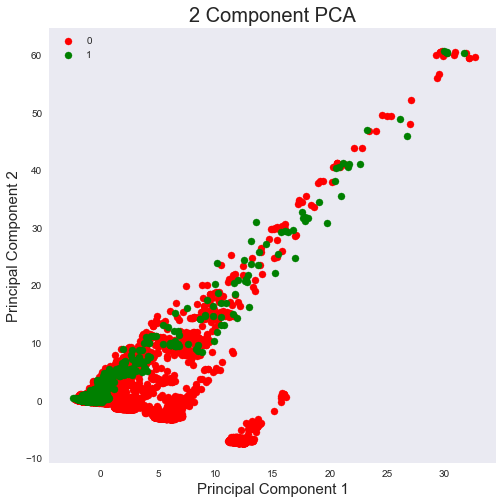

In [30]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = [0,1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Criminal'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

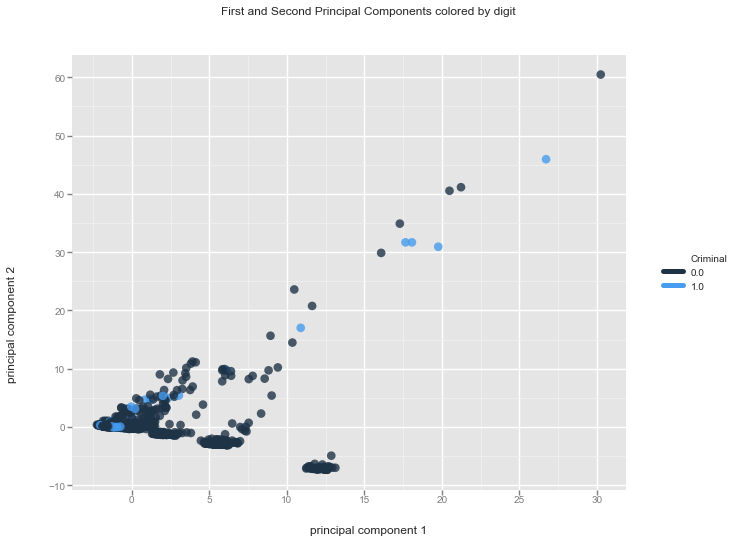

<ggplot: (18294248)>

In [28]:
##3 dimensional PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(train1)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2','principal component 3'])

finalDf = pd.concat([principalDf, tr_Criminal], axis = 1)

rndperm = np.random.permutation(finalDf.shape[0])

chart = ggplot( finalDf.loc[rndperm[:3000],:], aes(x='principal component 1', y='principal component 2', color='Criminal') ) \
        + geom_point(size=75,alpha=0.8) \
        + ggtitle("First and Second Principal Components colored by digit")
chart

In [18]:
pca.explained_variance_ratio_

array([0.12647244, 0.10903984])

In [102]:
##feature selection to get important features only.
sel = VarianceThreshold(threshold=(.9 * (1 - .9)))
# sel.fit(st_train)
# st_train = sel.transform(st_train)
# st_test = sel.transform(st_test)
sel.fit(train1)
train1 = sel.transform(train1)
test1 = sel.transform(test1)

In [149]:
cat_features = ['IIHHSIZ2', 'IIKI17_2', 'IRMCDCHP', 'IIMCDCHP', 'IRMEDICR', 'IIMEDICR', 'IRCHMPUS', 'IICHMPUS', 'IRPRVHLT', 'IIPRVHLT', 'HLCALLFG', 'HLCALL99',
 'IRINSUR4', 'IIINSUR4', 'OTHINS', 'IRFAMSOC', 'IIFAMSOC', 'IRFAMSSI', 'IIFAMSSI', 'IRFSTAMP', 'IIFSTAMP', 'IRFAMPMT', 'IIFAMPMT', 'IRFAMSVC',
 'IIFAMSVC', 'IIPINC3', 'IIFAMIN3', 'GOVTPROG', 'MAIIN102', 'AIIND102', 'VEREP', 'IRHH65_2', 'IIHH65_2', 'PDEN10', 'COUTYP2']

num_features = ['IFATHER', 'NRCH17_2', 'IRHHSIZ2', 'IRKI17_2', 'PRXRETRY', 'PRXYDATA', 'MEDICARE', 'CAIDCHIP', 'CHAMPUS', 'PRVHLTIN', 'GRPHLTIN',
 'HLTINNOS', 'HLCNOTYR', 'HLCNOTMO', 'HLCLAST', 'HLLOSRSN', 'HLNVCOST', 'HLNVOFFR', 'HLNVREF', 'HLNVNEED', 'HLNVSOR', 'IROTHHLT', 'IIOTHHLT', 'ANYHLTI2',
 'CELLNOTCL', 'CELLWRKNG', 'IRWELMOS', 'IIWELMOS', 'IRPINC3', 'IRFAMIN3', 'POVERTY3', 'TOOLONG', 'TROUBUND', 'VESTR']

for c in cat_features:
    le = LabelEncoder()
    le.fit(train1[c])
    train1[c] = le.transform(train1[c])
    test1[c] = le.transform(test1[c])
print('label encoded')
print(train1.shape)
print(test1.shape)

cat_train,cat_test= Make_2way(train1[cat_features].values, test1[cat_features].values)
print(cat_train.shape)
print(cat_test.shape)
train2 = np.hstack((train1,cat_train))
test2 = np.hstack((test1,cat_test))
print(train2.shape)
print(test2.shape)

enc = OneHotEncoder()
enc.fit(train2)
X_cat = enc.transform(train2)
X_t_cat = enc.transform(test2)
print(X_cat.shape)
print(X_t_cat.shape)


label encoded
(45716, 69)
(11430, 69)
Adding columns' interraction 0 and 1
Adding columns' interraction 0 and 2
Adding columns' interraction 0 and 3
Adding columns' interraction 0 and 4
Adding columns' interraction 0 and 5
Adding columns' interraction 0 and 6
Adding columns' interraction 0 and 7
Adding columns' interraction 0 and 8
Adding columns' interraction 0 and 9
Adding columns' interraction 0 and 10
Adding columns' interraction 0 and 11
Adding columns' interraction 0 and 12
Adding columns' interraction 0 and 13
Adding columns' interraction 0 and 14
Adding columns' interraction 0 and 15
Adding columns' interraction 0 and 16
Adding columns' interraction 0 and 17
Adding columns' interraction 0 and 18
Adding columns' interraction 0 and 19
Adding columns' interraction 0 and 20
Adding columns' interraction 0 and 21
Adding columns' interraction 0 and 22
Adding columns' interraction 0 and 23
Adding columns' interraction 0 and 24
Adding columns' interraction 0 and 25
Adding columns' inter

Adding columns' interraction 6 and 34
Adding columns' interraction 7 and 8
Adding columns' interraction 7 and 9
Adding columns' interraction 7 and 10
Adding columns' interraction 7 and 11
Adding columns' interraction 7 and 12
Adding columns' interraction 7 and 13
Adding columns' interraction 7 and 14
Adding columns' interraction 7 and 15
Adding columns' interraction 7 and 16
Adding columns' interraction 7 and 17
Adding columns' interraction 7 and 18
Adding columns' interraction 7 and 19
Adding columns' interraction 7 and 20
Adding columns' interraction 7 and 21
Adding columns' interraction 7 and 22
Adding columns' interraction 7 and 23
Adding columns' interraction 7 and 24
Adding columns' interraction 7 and 25
Adding columns' interraction 7 and 26
Adding columns' interraction 7 and 27
Adding columns' interraction 7 and 28
Adding columns' interraction 7 and 29
Adding columns' interraction 7 and 30
Adding columns' interraction 7 and 31
Adding columns' interraction 7 and 32
Adding columns

Adding columns' interraction 16 and 22
Adding columns' interraction 16 and 23
Adding columns' interraction 16 and 24
Adding columns' interraction 16 and 25
Adding columns' interraction 16 and 26
Adding columns' interraction 16 and 27
Adding columns' interraction 16 and 28
Adding columns' interraction 16 and 29
Adding columns' interraction 16 and 30
Adding columns' interraction 16 and 31
Adding columns' interraction 16 and 32
Adding columns' interraction 16 and 33
Adding columns' interraction 16 and 34
Adding columns' interraction 17 and 18
Adding columns' interraction 17 and 19
Adding columns' interraction 17 and 20
Adding columns' interraction 17 and 21
Adding columns' interraction 17 and 22
Adding columns' interraction 17 and 23
Adding columns' interraction 17 and 24
Adding columns' interraction 17 and 25
Adding columns' interraction 17 and 26
Adding columns' interraction 17 and 27
Adding columns' interraction 17 and 28
Adding columns' interraction 17 and 29
Adding columns' interract

In [61]:
## used the boruta feature selection package.
boruta_fet = ['IFATHER', 'IRMCDCHP', 'IIMCDCHP', 'IRMEDICR', 'IRPRVHLT', 'IIPRVHLT', 'IROTHHLT', 'ANYHLTI2', 'IRINSUR4', 'IIINSUR4',
 'HLNVSOR', 'OTHINS', 'IRFAMSOC', 'IRFAMSSI', 'IRFSTAMP', 'IIWELMOS', 'IRPINC3', 'IRFAMIN3', 'GOVTPROG', 'POVERTY3',
  'ANALWT_C','CELLNOTCL', 'HLNVNEED', 'IIOTHHLT', 'HLNVOFFR', 'PRXYDATA', 'MEDICARE', 'CAIDCHIP', 'CHAMPUS', 'PRVHLTIN',
 'GRPHLTIN', 'IRHH65_2', 'IRKI17_2', 'HLNVREF', 'HLCNOTYR', 'HLCNOTMO', 'IRHHSIZ2', 'NRCH17_2', 'HLCLAST', 'HLLOSRSN',
 'HLNVCOST', 'HLTINNOS']
#'ANALWT_C',
train3 = train2[boruta_fet]
test3 = test2[boruta_fet]

In [207]:
test3.shape

(11430, 41)

In [178]:
#label  encoded all the features
for c in train1.columns:
    le = LabelEncoder()
    le.fit(train1[c])
    train1[c] = le.transform(train1[c])
    test1[c] = le.transform(test1[c])

In [45]:
#Under Sampling of data
train_mino=train[train['Criminal']==1]
train_maj=train[train['Criminal']==0]

train_major=train_maj.sample(n=3200)
# train_major.head()
train=pd.concat([train_mino,train_major])
len(train)

In [ ]:
encoder = OneHotEncoder()
# encoder.fit(np.vstack((train1, test1)))
# st_train = encoder.transform(train1)
# st_test = encoder.transform(test1)

encoder.fit(np.vstack((st_train1, st_test1)))
st_train = encoder.transform(st_train1)
st_test = encoder.transform(st_test1)

In [8]:
##noramalizing or scaling of data
# st_train = preprocessing.normalize(train1)
# st_test = preprocessing.normalize(test1)
st_test = preprocessing.scale(test1)
st_train = preprocessing.scale(train1)

In [229]:
##one hot encoding of training and testing data
encoder = OneHotEncoder()
encoder.fit(np.vstack((train3.values, test3.values)))
st_train = encoder.transform(train3.values)
st_test = encoder.transform(test3.values)

In [51]:
Y=tr_Criminal.values

In [ ]:
tr_Criminal

In [60]:
#oversampling of data
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
st_train, Y = sm.fit_sample(train1, tr_Criminal)
st_test=test1.values

In [118]:
st_train[:2]
# test1.shape

<2x332 sparse matrix of type '<class 'numpy.float64'>'
	with 138 stored elements in Compressed Sparse Row format>

In [56]:
# print(Y.shape)
print(st_train.shape)
print(st_test.shape)

# print(st_train1.shape)
# print(st_test1.shape)

print(train2.shape)
print(test1.shape)
# (45716, 332)
# (11430, 332)

(45716, 403)
(11430, 403)
(45716, 70)
(11430, 69)


In [57]:
#do two way interaction between some of the features
def Make_2way(X, Xt):
    columns_length=X.shape[1]
    for j in range (0,columns_length,random.randint(1,5)):
        for d in range (j+1,columns_length,random.randint(1,5)):  
            print(("Adding columns' interraction %d and %d" % (j, d) ))
            new_column_train=X[:,j]+X[:,d]
            new_column_test=Xt[:,j]+Xt[:,d]    
            X=np.column_stack((X,new_column_train))
            Xt=np.column_stack((Xt,new_column_test))
    return X, Xt

In [199]:
#do two way interaction between all the featuresdef Make_2way(X, Xt):
    columns_length=X.shape[1]
    for j in range (0,columns_length):
        for d in range (j+1,columns_length):  
            print(("Adding columns' interraction %d and %d" % (j, d) ))
            new_column_train=X[:,j]+X[:,d]
            new_column_test=Xt[:,j]+Xt[:,d]    
            X=np.column_stack((X,new_column_train))
            Xt=np.column_stack((Xt,new_column_test))
    return X, Xt

In [200]:
# st_train1,st_test1= Make_2way(train1, test1)
st_train,st_test= Make_2way(train3.values, test3.values)
# st_train,st_test= Make_2way(st_train, st_test)

Adding columns' interraction 0 and 1
Adding columns' interraction 0 and 2
Adding columns' interraction 0 and 3
Adding columns' interraction 0 and 4
Adding columns' interraction 0 and 5
Adding columns' interraction 0 and 6
Adding columns' interraction 0 and 7
Adding columns' interraction 0 and 8
Adding columns' interraction 0 and 9
Adding columns' interraction 0 and 10
Adding columns' interraction 0 and 11
Adding columns' interraction 0 and 12
Adding columns' interraction 0 and 13
Adding columns' interraction 0 and 14
Adding columns' interraction 0 and 15
Adding columns' interraction 0 and 16
Adding columns' interraction 0 and 17
Adding columns' interraction 0 and 18
Adding columns' interraction 0 and 19
Adding columns' interraction 0 and 20
Adding columns' interraction 0 and 21
Adding columns' interraction 0 and 22
Adding columns' interraction 0 and 23
Adding columns' interraction 0 and 24
Adding columns' interraction 0 and 25
Adding columns' interraction 0 and 26
Adding columns' inter

Adding columns' interraction 5 and 29
Adding columns' interraction 5 and 30
Adding columns' interraction 5 and 31
Adding columns' interraction 5 and 32
Adding columns' interraction 5 and 33
Adding columns' interraction 5 and 34
Adding columns' interraction 5 and 35
Adding columns' interraction 5 and 36
Adding columns' interraction 5 and 37
Adding columns' interraction 5 and 38
Adding columns' interraction 5 and 39
Adding columns' interraction 5 and 40
Adding columns' interraction 5 and 41
Adding columns' interraction 6 and 7
Adding columns' interraction 6 and 8
Adding columns' interraction 6 and 9
Adding columns' interraction 6 and 10
Adding columns' interraction 6 and 11
Adding columns' interraction 6 and 12
Adding columns' interraction 6 and 13
Adding columns' interraction 6 and 14
Adding columns' interraction 6 and 15
Adding columns' interraction 6 and 16
Adding columns' interraction 6 and 17
Adding columns' interraction 6 and 18
Adding columns' interraction 6 and 19
Adding columns'

Adding columns' interraction 12 and 19
Adding columns' interraction 12 and 20
Adding columns' interraction 12 and 21
Adding columns' interraction 12 and 22
Adding columns' interraction 12 and 23
Adding columns' interraction 12 and 24
Adding columns' interraction 12 and 25
Adding columns' interraction 12 and 26
Adding columns' interraction 12 and 27
Adding columns' interraction 12 and 28
Adding columns' interraction 12 and 29
Adding columns' interraction 12 and 30
Adding columns' interraction 12 and 31
Adding columns' interraction 12 and 32
Adding columns' interraction 12 and 33
Adding columns' interraction 12 and 34
Adding columns' interraction 12 and 35
Adding columns' interraction 12 and 36
Adding columns' interraction 12 and 37
Adding columns' interraction 12 and 38
Adding columns' interraction 12 and 39
Adding columns' interraction 12 and 40
Adding columns' interraction 12 and 41
Adding columns' interraction 13 and 14
Adding columns' interraction 13 and 15
Adding columns' interract

Adding columns' interraction 20 and 34
Adding columns' interraction 20 and 35
Adding columns' interraction 20 and 36
Adding columns' interraction 20 and 37
Adding columns' interraction 20 and 38
Adding columns' interraction 20 and 39
Adding columns' interraction 20 and 40
Adding columns' interraction 20 and 41
Adding columns' interraction 21 and 22
Adding columns' interraction 21 and 23
Adding columns' interraction 21 and 24
Adding columns' interraction 21 and 25
Adding columns' interraction 21 and 26
Adding columns' interraction 21 and 27
Adding columns' interraction 21 and 28
Adding columns' interraction 21 and 29
Adding columns' interraction 21 and 30
Adding columns' interraction 21 and 31
Adding columns' interraction 21 and 32
Adding columns' interraction 21 and 33
Adding columns' interraction 21 and 34
Adding columns' interraction 21 and 35
Adding columns' interraction 21 and 36
Adding columns' interraction 21 and 37
Adding columns' interraction 21 and 38
Adding columns' interract

Adding columns' interraction 37 and 41
Adding columns' interraction 38 and 39
Adding columns' interraction 38 and 40
Adding columns' interraction 38 and 41
Adding columns' interraction 39 and 40
Adding columns' interraction 39 and 41
Adding columns' interraction 40 and 41


In [155]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer

def gini(truth, predictions):
    g = np.asarray(np.c_[truth, predictions, np.arange(len(truth)) ], dtype=np.float)
    g = g[np.lexsort((g[:,2], -1*g[:,1]))]
    gs = g[:,0].cumsum().sum() / g[:,0].sum()
    gs -= (len(truth) + 1) / 2.
    return gs / len(truth)

def gini_xgb(predictions, truth):
    truth = truth.get_label()
    return 'gini', -1.0 * gini(truth, predictions) / gini(truth, truth)

def gini_lgb(truth, predictions):
    score = gini(truth, predictions) / gini(truth, truth)
    return 'gini', score, True

def gini_sklearn(truth, predictions):
    return gini(truth, predictions) / gini(truth, truth)

gini_scorer = make_scorer(gini_sklearn, greater_is_better=True, needs_proba=True)

In [159]:
%%time
## tune lgbm and xgboost hyperparameters.
def objective(params):
    params = {
        'num_leaves': int(params['num_leaves']),
        'colsample_bytree': '{:.3f}'.format(params['colsample_bytree']),
    }
    
    clf = lgb.LGBMClassifier(
        n_estimators=500,
        **params
    )
    
    score = cross_val_score(clf, train1, Y, scoring=gini_scorer, cv=StratifiedKFold()).mean()
    print("Gini {:.3f} params {}".format(score, params))
    return score

space = {
    'num_leaves': hp.quniform('num_leaves', 8, 128, 2),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 1.0),
    'learning_rate': hp.uniform('learning_rate', 0.001, 0.01),
    'n_estimators': hp.quniform('n_estimators', 8, 48,4),
    'subsample': hp.uniform('subsample', 0.5, 1.0)
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=150)

Gini -0.933 params {'num_leaves': 108, 'colsample_bytree': '0.720'}
Gini -0.932 params {'num_leaves': 120, 'colsample_bytree': '0.409'}
Gini -0.937 params {'num_leaves': 36, 'colsample_bytree': '0.602'}
Gini -0.939 params {'num_leaves': 24, 'colsample_bytree': '0.540'}
Gini -0.932 params {'num_leaves': 84, 'colsample_bytree': '0.803'}
Gini -0.939 params {'num_leaves': 16, 'colsample_bytree': '0.996'}
Gini -0.936 params {'num_leaves': 36, 'colsample_bytree': '0.889'}
Gini -0.934 params {'num_leaves': 76, 'colsample_bytree': '0.368'}
Gini -0.933 params {'num_leaves': 102, 'colsample_bytree': '0.724'}
Gini -0.932 params {'num_leaves': 112, 'colsample_bytree': '0.834'}
Gini -0.934 params {'num_leaves': 68, 'colsample_bytree': '0.424'}
Gini -0.939 params {'num_leaves': 22, 'colsample_bytree': '0.537'}
Gini -0.934 params {'num_leaves': 78, 'colsample_bytree': '0.402'}
Gini -0.933 params {'num_leaves': 86, 'colsample_bytree': '0.593'}
Gini -0.937 params {'num_leaves': 44, 'colsample_bytree': 

Gini -0.932 params {'num_leaves': 126, 'colsample_bytree': '0.517'}
Gini -0.942 params {'num_leaves': 8, 'colsample_bytree': '0.590'}
Gini -0.938 params {'num_leaves': 30, 'colsample_bytree': '0.430'}
Gini -0.935 params {'num_leaves': 52, 'colsample_bytree': '0.557'}
Gini -0.934 params {'num_leaves': 76, 'colsample_bytree': '0.446'}
Gini -0.935 params {'num_leaves': 48, 'colsample_bytree': '0.620'}
Gini -0.940 params {'num_leaves': 26, 'colsample_bytree': '0.368'}
Gini -0.937 params {'num_leaves': 38, 'colsample_bytree': '0.406'}
Gini -0.934 params {'num_leaves': 70, 'colsample_bytree': '0.346'}
Gini -0.940 params {'num_leaves': 22, 'colsample_bytree': '0.466'}
Gini -0.941 params {'num_leaves': 18, 'colsample_bytree': '0.493'}
Gini -0.935 params {'num_leaves': 44, 'colsample_bytree': '0.711'}
Gini -0.935 params {'num_leaves': 58, 'colsample_bytree': '0.578'}
Gini -0.941 params {'num_leaves': 16, 'colsample_bytree': '0.321'}
Gini -0.933 params {'num_leaves': 86, 'colsample_bytree': '0.4

In [160]:
best

{'colsample_bytree': 0.48062240782490784,
 'learning_rate': 0.005930822307248646,
 'n_estimators': 28.0,
 'num_leaves': 8.0,
 'subsample': 0.7574992992760194}

In [21]:
##scaling the train and test
scaler = StandardScaler()

scaler.fit(d_train)
# Apply transform to both the training set and the test set.
d_train1 = scaler.transform(d_train)
d_test1 = scaler.transform(d_test)

In [55]:
##create cross validation fold for training data and test data
from sklearn.cross_validation import StratifiedKFold
SEED=42
# clf = lgb.LGBMClassifier()

# st_train = X_cat
# st_test = X_t_cat
# st_train = train3.values
# st_test = test3.values
st_train = d_train1
st_test = d_test1
# , random_state=SEED
# clf = lgb.LGBMClassifier(metric= 'auc', learning_rate = 0.01, max_depth = 10, max_bin = 10, objective= 'binary', feature_fraction =  0.8,bagging_fraction = 0.9,bagging_freq = 10, min_data = 500)
# clf = lgb.LGBMClassifier(colsample_bytree= 0.480, learning_rate=0.0059, n_estimators=28, num_leaves= 8, subsample=0.75 )
# clf=CatBoostClassifier(iterations=80)
# clf = XGBClassifier()
# clf=ExtraTreesClassifier(n_estimators=10000, criterion='entropy', max_depth=9,  min_samples_leaf=1,  n_jobs=30, random_state=1)

clf = RGFClassifier(max_leaf=500,algorithm="RGF",test_interval=100, loss="LS")
# clf = LogisticRegression()
# clf = LogisticRegression(class_weight ={1:10})
# clf = LinearRegression()
# clf = Ridge()
# clf = GradientBoostingClassifier()
# clf = AdaBoostClassifier(n_estimators=100)

fold = 5
cv = StratifiedKFold(Y, n_folds=fold,shuffle=True, random_state=42)
X_preds = np.zeros(st_train.shape[0])
preds = np.zeros(st_test.shape[0])
for i, (tr, ts) in enumerate(cv):
    print(ts.shape)
#     clf.set_params(random_state=seed + i)
#     mod = clf.fit(st_train[tr], Y[tr],eval_set=eval_set,eval_metric="auc",early_stopping_rounds=30)
    mod = clf.fit(st_train[tr], Y[tr])
    X_preds[ts] = mod.predict_proba(st_train[ts])[:,1]
    preds += mod.predict_proba(st_test)[:,1]
    print("fold {}, ROC AUC: {:.3f}".format(i, roc_auc_score(Y[ts], X_preds[ts])))
    predictions = [round(value) for value in X_preds[ts]]
    print(matthews_corrcoef(Y[ts], predictions))
print(roc_auc_score(Y, X_preds))
preds1 = preds/fold

KeyboardInterrupt: 

In [57]:
from sklearn.cross_validation import StratifiedKFold
from sklearn.calibration import CalibratedClassifierCV
SEED=42
clf1 = lgb.LGBMClassifier()
clf = CalibratedClassifierCV(clf1, method='sigmoid', cv=5)
# calibrated_clf.fit(Xtrain, ytrain)
# st_train = X_cat
# st_test = X_t_cat
# st_train = train3.values
# st_test = test3.values
st_train = d_train1
st_test = d_test1

# clf = XGBClassifier()
# clf=ExtraTreesClassifier(n_estimators=10000, criterion='entropy', max_depth=9,  min_samples_leaf=1,  n_jobs=30, random_state=1)

# clf = RGFClassifier(max_leaf=500,algorithm="RGF",test_interval=100, loss="LS")
# clf = LogisticRegression()
# clf = LogisticRegression(class_weight ={1:10})

fold = 5
cv = StratifiedKFold(Y, n_folds=fold,shuffle=True, random_state=42)
X_preds = np.zeros(st_train.shape[0])
preds = np.zeros(st_test.shape[0])
for i, (tr, ts) in enumerate(cv):
    print(ts.shape)
#     clf.set_params(random_state=seed + i)
#     mod = clf.fit(st_train[tr], Y[tr],eval_set=eval_set,eval_metric="auc",early_stopping_rounds=30)
    mod = clf.fit(st_train[tr], Y[tr])
    X_preds[ts] = mod.predict_proba(st_train[ts])[:,1]
    preds += mod.predict_proba(st_test)[:,1]
    print("fold {}, ROC AUC: {:.3f}".format(i, roc_auc_score(Y[ts], X_preds[ts])))
    predictions = [round(value) for value in X_preds[ts]]
    print(matthews_corrcoef(Y[ts], predictions))
print(roc_auc_score(Y, X_preds))
preds1 = preds/fold

(9144,)
fold 0, ROC AUC: 0.968
0.5686701750995339
(9143,)
fold 1, ROC AUC: 0.970
0.5797685446555542
(9143,)
fold 2, ROC AUC: 0.971
0.5897212874517239
(9143,)
fold 3, ROC AUC: 0.972
0.5745120208884987
(9143,)
fold 4, ROC AUC: 0.971
0.5917588982926634
0.9699372888442774


In [62]:
##get highest fold predictions
## used for geometric mean of the fold predictions
from sklearn.cross_validation import StratifiedKFold
SEED=42
clf = lgb.LGBMClassifier()
# clf = LogisticRegression()
dd={}
fold = 5
cv = StratifiedKFold(Y, n_folds=fold,shuffle=True)
X_preds = np.zeros(st_train.shape[0])
preds = np.zeros(st_test.shape[0])
for i, (tr, ts) in enumerate(cv):
    print(ts.shape)    
    eval_set  = [(st_train[tr], Y[tr]), (st_train[ts],Y[ts])]
#     mod = clf.fit(st_train[tr], Y[tr],eval_set=eval_set,eval_metric="auc",early_stopping_rounds=30)
    mod = clf.fit(st_train[tr], Y[tr])
#     preds += mod.predict_proba(st_test)[:,1]
    X_preds[ts] = mod.predict_proba(st_train[ts])[:,1]
    print("fold {}, ROC AUC: {:.3f}".format(i, roc_auc_score(Y[ts], X_preds[ts])))
    predictions = [round(value) for value in X_preds[ts]]
    print(matthews_corrcoef(Y[ts], predictions))
    dd[matthews_corrcoef(Y[ts], predictions)] = mod.predict_proba(st_test)[:,1]
print(roc_auc_score(Y, X_preds))
preds1 = preds/fold

(9144,)


KeyboardInterrupt: 

In [108]:
preds1 = dd[0.633877045688326]

In [69]:
bb=[1,2,4,8,16]
#sum(bb) - 31
preds = np.zeros(st_test.shape[0])
aa=sorted(list(dd.keys()))
for i,j in enumerate(aa):
    preds += bb[i] * dd[j]
    print(bb[i] * dd[j])
preds1 = preds/sum(bb)

[9.65887022e-02 3.23049824e-05 2.67331320e-05 ... 6.85734645e-05
 2.67331320e-05 2.67331320e-05]
[1.22493904e-01 5.84281798e-05 5.34188653e-05 ... 1.47753998e-04
 5.34188653e-05 5.34188653e-05]
[3.05015288e-01 1.05738333e-04 1.12963491e-04 ... 2.59694835e-04
 8.22501137e-05 1.00156237e-04]
[6.96032245e-01 2.11526760e-04 1.75212823e-04 ... 3.40154470e-04
 1.75212823e-04 1.75212823e-04]
[9.38003466e-01 5.17568766e-04 4.57658383e-04 ... 1.18269749e-03
 4.57658383e-04 4.57658383e-04]


C:\Users\royal\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


0.637506292826641
0.09


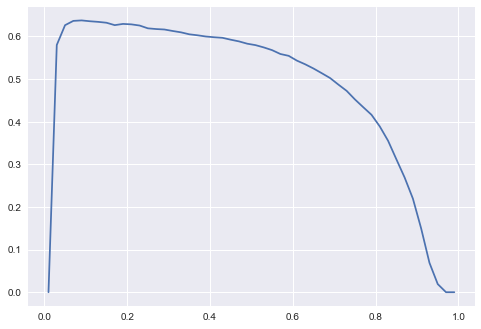

In [58]:
# pick the best threshold out-of-fold

thresholds = np.linspace(0.01, 0.99, 50)
mcc = np.array([matthews_corrcoef(Y, X_preds>thr) for thr in thresholds])
plt.plot(thresholds, mcc)
best_threshold = thresholds[mcc.argmax()]
print(mcc.max())
print(best_threshold)

In [59]:
prediction_rfc=list(range(len(preds1)))
for i in range(len(preds1)):
    prediction_rfc[i]=1 if preds1[i]>best_threshold else 0

sub = pd.DataFrame({'PERID': ts_PERID, 'Criminal': prediction_rfc})
sub=sub.reindex(columns=["PERID","Criminal"])
filename = 'submission.csv'
sub.to_csv(filename, index=False)

In [16]:
X_preds[:50]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [60]:
##for OOF files generation.
prediction_rfc=list(range(len(preds1)))
for i in range(len(preds1)):
    prediction_rfc[i]=1 if preds1[i]>best_threshold else 0

sub = pd.DataFrame({'PERID': ts_PERID, 'Criminal': prediction_rfc})
sub=sub.reindex(columns=["PERID","Criminal"])
filename = 'submission_test_'+'lgbm_dae83060_'+str(mcc.max())+'.csv'
sub.to_csv(filename, index=False)


prediction_tr=list(range(len(X_preds)))
for i in range(len(X_preds)):
    prediction_tr[i]=1 if X_preds[i]>best_threshold else 0

sub = pd.DataFrame({'PERID': tr_PERID, 'Criminal': prediction_tr})
sub=sub.reindex(columns=["PERID","Criminal"])
filename = filename = 'submission_train_'+'lgbm_dae83060_'+str(mcc.max())+'.csv'
sub.to_csv(filename, index=False)

In [113]:
# clf = lgb.LGBMClassifier()
seed=42
# clf = LGBMRegressor()
# clf = Ridge()
# clf=CatBoostClassifier(iterations=80)
# clf=SVC()
# clf = LinearRegression()
clf = NearestCentroid()
# clf = Lasso()
# st_train=st_train.A
# st_test=st_test.A

fold = 5
cv = StratifiedKFold(Y, n_folds=fold,shuffle=True)
X_preds = np.ones(st_train.shape[0])
preds = np.zeros(st_test.shape[0])
for i, (tr, ts) in enumerate(cv):
    print(ts.shape)
#     clf.set_params(random_state=seed + i)
    mod = clf.fit(st_train[tr], Y[tr])
    preds += mod.predict(st_test)
    X_preds[ts] = mod.predict(st_train[ts])
#     preds += mod.predict_proba(st_test)[:,1]
#     X_preds[ts] = mod.predict_proba(st_train[ts])[:,1]
    print("fold {}, ROC AUC: {:.3f}".format(i, roc_auc_score(Y[ts], X_preds[ts])))
    predictions = [round(value) for value in X_preds[ts]]
    print(matthews_corrcoef(Y[ts], predictions))
print(roc_auc_score(Y, X_preds))
preds1 = preds/fold

(9144,)
fold 0, ROC AUC: 0.838
0.3645053654483497
(9143,)
fold 1, ROC AUC: 0.839
0.36636333002963856
(9143,)
fold 2, ROC AUC: 0.835
0.35970875422847537
(9143,)
fold 3, ROC AUC: 0.831
0.35971393446092176
(9143,)
fold 4, ROC AUC: 0.831
0.35980942575095276
0.8349966229891793


In [84]:
# preds1=preds1.astype(int)
sub = pd.DataFrame({'PERID': ts_PERID, 'Criminal': preds1})
sub=sub.reindex(columns=["PERID","Criminal"])
filename = 'submission.csv'
sub.to_csv(filename, index=False)

In [13]:
## simple vanilla Neural Network
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import RMSprop,Adam

# Logistic regression model
def get_model(shape1):
    model = Sequential()
    model.add(Dense(output_dim=1000, input_dim=shape1, kernel_initializer='he_normal'))
    model.add(Activation('relu'))
    model.add(Dropout(0.4))
    model.add(Dense(output_dim=100, input_dim=1000, kernel_initializer='he_normal'))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(output_dim=2, input_dim=100, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
#     model.compile(optimizer=RMSprop(lr=0.001, rho=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

C:\Users\royal\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [49]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import RMSprop,Adam,SGD

from keras.layers import Dense, Dropout, Embedding, Flatten, Input, merge
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import PReLU


def get_model(shape1):
    model = Sequential()
    model.add(Dense(512, input_dim=shape1, kernel_initializer='glorot_uniform'))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(100, kernel_initializer='glorot_uniform'))
    model.add(Activation('relu'))
    model.add(Dropout(0.4))
    model.add(Dense(2, kernel_initializer='normal', activation='sigmoid'))
    #model.add(Activation('softmax'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.005), metrics=['accuracy'])
#     model.compile(optimizer=RMSprop(lr=0.001, rho=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

In [87]:
preds1[:5]

array([1.68553375e-01, 2.32654770e-07, 8.39065942e-05, 1.27006922e-06,
       5.12602863e-04])

In [50]:
## folds for Neural network
seed=42

st_train = d_train1
st_test = d_test1
# st_train = X_cat
# st_test = X_t_cat

# clf = get_model(st_train.shape[1])
Y=tr_Criminal.values
fold = 2
cv = StratifiedKFold(Y, n_folds=fold,shuffle=True)
Y_tr = np_utils.to_categorical(Y, 2)
X_preds = np.ones(st_train.shape[0])
preds = np.zeros(st_test.shape[0])
for i, (tr, ts) in enumerate(cv):
    print(ts.shape)
    clf = get_model(st_train.shape[1])
    clf.fit(st_train[tr], Y_tr[tr], epochs=5, batch_size=100, verbose=1)
    preds += clf.predict_proba(st_test)[:,1]
    X_preds[ts] = clf.predict_proba(st_train[ts])[:,1]
    print("fold {}, ROC AUC: {:.3f}".format(i, roc_auc_score(Y[ts], X_preds[ts])))
    predictions = [round(value) for value in X_preds[ts]]
    print(matthews_corrcoef(Y[ts], predictions))
print(roc_auc_score(Y, X_preds))
preds1 = preds/fold

(22859,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 512)               206848    
_________________________________________________________________
activation_29 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 100)               51300     
_________________________________________________________________
activation_30 (Activation)   (None, 100)               0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 2)                 202       
T

In [82]:
gridParams = {
    'learning_rate': [0.003,0.005,0.001],
    'n_estimators': [8,16,24,32],
    'num_leaves': [6,8,12,16,32,64,128,150,200],
    'boosting_type' : ['gbdt'],
    'objective' : ['binary'],
    'random_state' : [501], # Updated from 'seed'
    'colsample_bytree' : [0.64, 0.65, 0.66,0.70],
    'subsample' : [0.7,0.75,0.5,0.6],
    'reg_alpha' : [1,1.2],
    'reg_lambda' : [1,1.2,1.4],
    'metric':['auc','mcc','binary_logloss'],
    'max_depth':[4,5,6,7,8],
    'max_bin':[100,150,200,250,300,350,400]
    }

model=lgb.LGBMClassifier()

random_search = RandomizedSearchCV(model, param_distributions=gridParams,n_iter=30)
random_search.fit(st_train, Y)
print(random_search.grid_scores_)

C:\Users\royal\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\royal\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\royal\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\royal\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\Users\royal\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\royal\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\royal\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\royal\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\Users\royal\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\royal\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\royal\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\royal\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[mean: 0.94921, std: 0.00043, params: {'subsample': 0.6, 'reg_lambda': 1.2, 'reg_alpha': 1, 'random_state': 501, 'objective': 'binary', 'num_leaves': 32, 'n_estimators': 24, 'metric': 'mcc', 'max_depth': 5, 'max_bin': 350, 'learning_rate': 0.005, 'colsample_bytree': 0.64, 'boosting_type': 'gbdt'}, mean: 0.95006, std: 0.00047, params: {'subsample': 0.5, 'reg_lambda': 1.4, 'reg_alpha': 1.2, 'random_state': 501, 'objective': 'binary', 'num_leaves': 200, 'n_estimators': 24, 'metric': 'binary_logloss', 'max_depth': 7, 'max_bin': 150, 'learning_rate': 0.005, 'colsample_bytree': 0.65, 'boosting_type': 'gbdt'}, mean: 0.95056, std: 0.00083, params: {'subsample': 0.75, 'reg_lambda': 1.2, 'reg_alpha': 1.2, 'random_state': 501, 'objective': 'binary', 'num_leaves': 32, 'n_estimators': 16, 'metric': 'binary_logloss', 'max_depth': 7, 'max_bin': 250, 'learning_rate': 0.001, 'colsample_bytree': 0.7, 'boosting_type': 'gbdt'}, mean: 0.94750, std: 0.00098, params: {'subsample': 0.75, 'reg_lambda': 1, 'reg

In [83]:
random_search.grid_scores_

[mean: 0.94921, std: 0.00043, params: {'subsample': 0.6, 'reg_lambda': 1.2, 'reg_alpha': 1, 'random_state': 501, 'objective': 'binary', 'num_leaves': 32, 'n_estimators': 24, 'metric': 'mcc', 'max_depth': 5, 'max_bin': 350, 'learning_rate': 0.005, 'colsample_bytree': 0.64, 'boosting_type': 'gbdt'},
 mean: 0.95006, std: 0.00047, params: {'subsample': 0.5, 'reg_lambda': 1.4, 'reg_alpha': 1.2, 'random_state': 501, 'objective': 'binary', 'num_leaves': 200, 'n_estimators': 24, 'metric': 'binary_logloss', 'max_depth': 7, 'max_bin': 150, 'learning_rate': 0.005, 'colsample_bytree': 0.65, 'boosting_type': 'gbdt'},
 mean: 0.95056, std: 0.00083, params: {'subsample': 0.75, 'reg_lambda': 1.2, 'reg_alpha': 1.2, 'random_state': 501, 'objective': 'binary', 'num_leaves': 32, 'n_estimators': 16, 'metric': 'binary_logloss', 'max_depth': 7, 'max_bin': 250, 'learning_rate': 0.001, 'colsample_bytree': 0.7, 'boosting_type': 'gbdt'},
 mean: 0.94750, std: 0.00098, params: {'subsample': 0.75, 'reg_lambda': 1, '

In [84]:
random_search.best_params_

{'boosting_type': 'gbdt',
 'colsample_bytree': 0.64,
 'learning_rate': 0.003,
 'max_bin': 250,
 'max_depth': 7,
 'metric': 'auc',
 'n_estimators': 32,
 'num_leaves': 150,
 'objective': 'binary',
 'random_state': 501,
 'reg_alpha': 1,
 'reg_lambda': 1,
 'subsample': 0.75}